# 1. Import packages

In [1]:
import sys
sys.path.append('..')
from modules import tuning, preprocess, tracking, benchmarking, graphics

Invoking __init__.py for modules


# 2. Load dataset

In [2]:
df = preprocess.load_csv_data('../dataset/Occupancy_Estimation.csv')

In [3]:
df.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

# 3. Data preprocessing
- Step 1: Transform features
  - Binary results for Room_Occupancy_Count
  - Drop Date and Time features
- Step 2: Clean data
  - Detect and apply treatment to
  - Drop duplicated rows

In [5]:
df = preprocess.preprocess_room_occupancy_dataset(df)

Features with outliers:  ['S1_Temp', 'S2_Temp', 'S1_Light', 'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR']
The shape of the data set before dropping duplicated:(10129, 17)
The shape of the data set after dropping duplicated:(8340, 17)


In [6]:
df.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,24.94,24.75,24.56,25.38,30.0,34.0,53.0,40.0,0.080,0.075,0.060,0.06,390.0,0.069231,0.0,0.0,1
1,24.94,24.75,24.56,25.44,30.0,33.0,53.0,40.0,0.095,0.050,0.060,0.06,390.0,0.069231,0.0,0.0,1
2,25.00,24.75,24.50,25.44,30.0,34.0,53.0,40.0,0.095,0.075,0.080,0.06,390.0,0.069231,0.0,0.0,1
3,25.00,24.75,24.56,25.44,30.0,34.0,53.0,40.0,0.095,0.075,0.085,0.09,390.0,0.069231,0.0,0.0,1
4,25.00,24.75,24.56,25.44,30.0,34.0,54.0,40.0,0.095,0.060,0.060,0.06,390.0,0.069231,0.0,0.0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8340 entries, 0 to 10128
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S1_Temp               8340 non-null   float64
 1   S2_Temp               8340 non-null   float64
 2   S3_Temp               8340 non-null   float64
 3   S4_Temp               8340 non-null   float64
 4   S1_Light              8340 non-null   float64
 5   S2_Light              8340 non-null   float64
 6   S3_Light              8340 non-null   float64
 7   S4_Light              8340 non-null   float64
 8   S1_Sound              8340 non-null   float64
 9   S2_Sound              8340 non-null   float64
 10  S3_Sound              8340 non-null   float64
 11  S4_Sound              8340 non-null   float64
 12  S5_CO2                8340 non-null   float64
 13  S5_CO2_Slope          8340 non-null   float64
 14  S6_PIR                8340 non-null   float64
 15  S7_PIR              

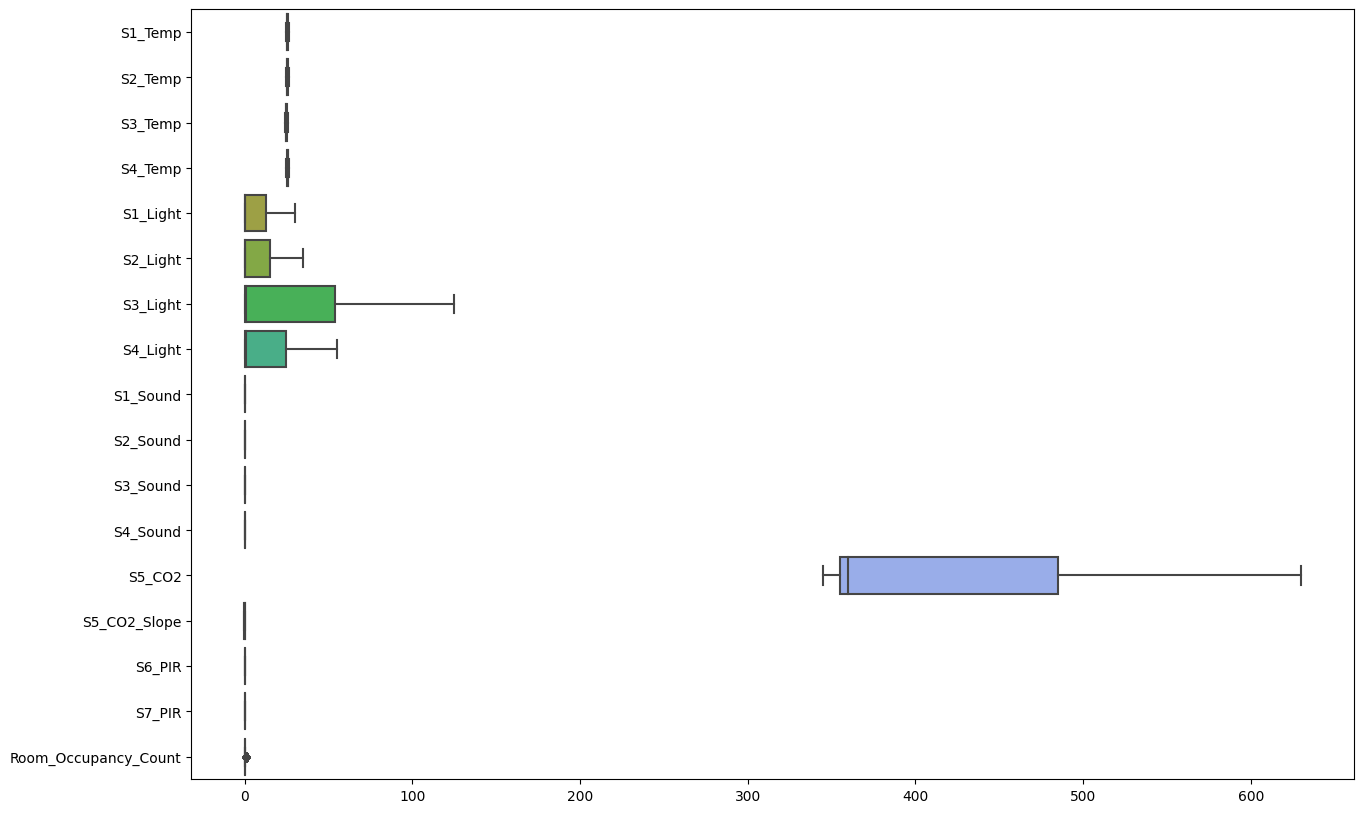

In [8]:
graphics.boxplot_df(df)

# 4. Tuning Hyperparameters: Cross Validation

In [9]:
# Split dataset into features and output
X = preprocess.get_features(df)
y = preprocess.get_output(df)

# Split dataset into training and test
X_train, X_test, y_train, y_test = preprocess.split_dataset(X, y)

## 1. Logistic Regression (LR)

In [10]:
LR_best_estimator = tuning.tuning_with_grid('LR', X_train, y_train, X_test, y_test, 5)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV] END estimator__C=0.001, estimator__penalty=l1, estimator__solver=lbfgs; total time=   0.0s
[CV] END estimator__C=0.001, estimator__penalty=l1, estimator__solver=lbfgs; total time=   0.0s
[CV] END estimator__C=0.001, estimator__penalty=l1, estimator__solver=lbfgs; total time=   0.0s
[CV] END estimator__C=0.001, estimator__penalty=l1, estimator__solver=lbfgs; total time=   0.0s
[CV] END estimator__C=0.001, estimator__penalty=l1, estimator__solver=lbfgs; total time=   0.0s
[CV] END estimator__C=0.001, estimator__penalty=l1, estimator__solver=liblinear; total time=   0.0s
[CV] END estimator__C=0.001, estimator__penalty=l1, estimator__solver=liblinear; total time=   0.0s
[CV] END estimator__C=0.001, estimator__penalty=l1, estimator__solver=liblinear; total time=   0.0s
[CV] END estimator__C=0.001, estimator__penalty=l1, estimator__solver=liblinear; total time=   0.0s
[CV] END estimator__C=0.001, estimator__penalty=l1, estima

## 2. Random Forest (RF)

In [11]:
RF_best_estimator = tuning.tuning_with_randomized('RF', X_train, y_train, X_test, y_test, 5)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=False, max_depth=9, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.3s
[CV] END bootstrap=False, max_depth=9, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.2s
[CV] END bootstrap=False, max_depth=9, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.2s
[CV] END bootstrap=False, max_depth=9, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.2s
[CV] END bootstrap=False, max_depth=9, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.3s
[CV] END bootstrap=True, max_depth=3, max_features=None, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstra

## 3. Support Vector Machine (SVM)

In [12]:
SVM_best_estimator = tuning.tuning_with_grid('SVM', X_train, y_train, X_test, y_test, 5)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END estimator__C=0.1, estimator__gamma=1, estimator__kernel=rbf; total time=   0.6s
[CV] END estimator__C=0.1, estimator__gamma=1, estimator__kernel=rbf; total time=   0.5s
[CV] END estimator__C=0.1, estimator__gamma=1, estimator__kernel=rbf; total time=   0.5s
[CV] END estimator__C=0.1, estimator__gamma=1, estimator__kernel=rbf; total time=   0.6s
[CV] END estimator__C=0.1, estimator__gamma=1, estimator__kernel=rbf; total time=   0.5s
[CV] END estimator__C=0.1, estimator__gamma=0.1, estimator__kernel=rbf; total time=   0.1s
[CV] END estimator__C=0.1, estimator__gamma=0.1, estimator__kernel=rbf; total time=   0.1s
[CV] END estimator__C=0.1, estimator__gamma=0.1, estimator__kernel=rbf; total time=   0.1s
[CV] END estimator__C=0.1, estimator__gamma=0.1, estimator__kernel=rbf; total time=   0.1s
[CV] END estimator__C=0.1, estimator__gamma=0.1, estimator__kernel=rbf; total time=   0.1s
[CV] END estimator__C=0.1, estimator__

## 4. Multilayer Perceptron (MLP)

In [13]:
MLP_best_estimator = tuning.tuning_with_randomized('MLP', X_train, y_train, X_test, y_test, 5)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END estimator__activation=identity, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(50, 100, 50), estimator__learning_rate=invscaling, estimator__solver=adam; total time=   1.8s
[CV] END estimator__activation=identity, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(50, 100, 50), estimator__learning_rate=invscaling, estimator__solver=adam; total time=   2.1s
[CV] END estimator__activation=identity, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(50, 100, 50), estimator__learning_rate=invscaling, estimator__solver=adam; total time=   1.2s
[CV] END estimator__activation=identity, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(50, 100, 50), estimator__learning_rate=invscaling, estimator__solver=adam; total time=   1.4s
[CV] END estimator__activation=identity, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(50, 100, 50), estimator__learning_rate=invscaling, estimator__solver=adam; tot

## Store tuned estimators

In [14]:
# Create list where we are to store the tuned models
estimators_list = []

# Add tuned models inside list
estimators_list.append(LR_best_estimator)
estimators_list.append(RF_best_estimator)
estimators_list.append(SVM_best_estimator)
estimators_list.append(MLP_best_estimator)

# 5. Track training process

## 1. Codecarbon

In [15]:
# Track estimators_list training with codecarbon
tracking.track_benchmarking_codecabon(estimators_list, X_train, y_train)

[codecarbon INFO @ 16:18:07] [setup] RAM Tracking...
[codecarbon INFO @ 16:18:07] [setup] GPU Tracking...
[codecarbon INFO @ 16:18:07] No GPU found.
[codecarbon INFO @ 16:18:07] [setup] CPU Tracking...
[codecarbon WARNING @ 16:18:07] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 16:18:09] CPU Model on constant consumption mode: Intel(R) Core(TM) i5-9400F CPU @ 2.90GHz
[codecarbon INFO @ 16:18:09] >>> Tracker's metadata:
[codecarbon INFO @ 16:18:09]   Platform system: Linux-5.19.0-38-generic-x86_64-with-glibc2.35
[codecarbon INFO @ 16:18:09]   Python version: 3.10.8
[codecarbon INFO @ 16:18:09]   Available RAM : 4.946 GB
[codecarbon INFO @ 16:18:09]   CPU count: 4
[codecarbon INFO @ 16:18:09]   CPU model: Intel(R) Core(TM) i5-9400F CPU @ 2.90GHz
[codecarbon INFO @ 16:18:09]   GPU count: None
[codecarbon INFO @ 16:18:09]   GPU model: None
[codecarbon INFO @ 16:18:12] Energy consumed for RAM : 0.000000 kWh. RAM Power : 1.8548641204833987 W
[codecarbon I

Emissions: 5.004570917206416e-08 kg


[codecarbon INFO @ 16:18:14] CPU Model on constant consumption mode: Intel(R) Core(TM) i5-9400F CPU @ 2.90GHz
[codecarbon INFO @ 16:18:14] >>> Tracker's metadata:
[codecarbon INFO @ 16:18:14]   Platform system: Linux-5.19.0-38-generic-x86_64-with-glibc2.35
[codecarbon INFO @ 16:18:14]   Python version: 3.10.8
[codecarbon INFO @ 16:18:14]   Available RAM : 4.946 GB
[codecarbon INFO @ 16:18:14]   CPU count: 4
[codecarbon INFO @ 16:18:14]   CPU model: Intel(R) Core(TM) i5-9400F CPU @ 2.90GHz
[codecarbon INFO @ 16:18:14]   GPU count: None
[codecarbon INFO @ 16:18:14]   GPU model: None
[codecarbon INFO @ 16:18:17] Energy consumed for RAM : 0.000000 kWh. RAM Power : 1.8548641204833987 W
[codecarbon INFO @ 16:18:17] Energy consumed for all CPUs : 0.000001 kWh. All CPUs Power : 32.5 W
[codecarbon INFO @ 16:18:17] 0.000001 kWh of electricity used since the begining.
[codecarbon INFO @ 16:18:17] [setup] RAM Tracking...
[codecarbon INFO @ 16:18:17] [setup] GPU Tracking...
[codecarbon INFO @ 16:18

Emissions: 2.1284085667833527e-07 kg


[codecarbon INFO @ 16:18:18] CPU Model on constant consumption mode: Intel(R) Core(TM) i5-9400F CPU @ 2.90GHz
[codecarbon INFO @ 16:18:18] >>> Tracker's metadata:
[codecarbon INFO @ 16:18:18]   Platform system: Linux-5.19.0-38-generic-x86_64-with-glibc2.35
[codecarbon INFO @ 16:18:18]   Python version: 3.10.8
[codecarbon INFO @ 16:18:18]   Available RAM : 4.946 GB
[codecarbon INFO @ 16:18:18]   CPU count: 4
[codecarbon INFO @ 16:18:18]   CPU model: Intel(R) Core(TM) i5-9400F CPU @ 2.90GHz
[codecarbon INFO @ 16:18:18]   GPU count: None
[codecarbon INFO @ 16:18:18]   GPU model: None
[codecarbon INFO @ 16:18:22] Energy consumed for RAM : 0.000000 kWh. RAM Power : 1.8548641204833987 W
[codecarbon INFO @ 16:18:22] Energy consumed for all CPUs : 0.000001 kWh. All CPUs Power : 32.5 W
[codecarbon INFO @ 16:18:22] 0.000001 kWh of electricity used since the begining.
[codecarbon INFO @ 16:18:22] [setup] RAM Tracking...
[codecarbon INFO @ 16:18:22] [setup] GPU Tracking...
[codecarbon INFO @ 16:18

Emissions: 1.2973093827296224e-07 kg


[codecarbon INFO @ 16:18:23] CPU Model on constant consumption mode: Intel(R) Core(TM) i5-9400F CPU @ 2.90GHz
[codecarbon INFO @ 16:18:23] >>> Tracker's metadata:
[codecarbon INFO @ 16:18:23]   Platform system: Linux-5.19.0-38-generic-x86_64-with-glibc2.35
[codecarbon INFO @ 16:18:23]   Python version: 3.10.8
[codecarbon INFO @ 16:18:23]   Available RAM : 4.946 GB
[codecarbon INFO @ 16:18:23]   CPU count: 4
[codecarbon INFO @ 16:18:23]   CPU model: Intel(R) Core(TM) i5-9400F CPU @ 2.90GHz
[codecarbon INFO @ 16:18:23]   GPU count: None
[codecarbon INFO @ 16:18:23]   GPU model: None
[codecarbon INFO @ 16:18:28] Energy consumed for RAM : 0.000001 kWh. RAM Power : 1.8548641204833987 W
[codecarbon INFO @ 16:18:28] Energy consumed for all CPUs : 0.000015 kWh. All CPUs Power : 32.5 W
[codecarbon INFO @ 16:18:28] 0.000016 kWh of electricity used since the begining.


Emissions: 2.982014969901925e-06 kg


## 2. Eco2AI

In [16]:
# Track estimators_list training with eco2ai
tracking.track_benchmarking_eco2ai(estimators_list, X_train, y_train)

# 6. Create benchmarking

In [17]:
benchmarking.create_benchmarking_csv()

In [18]:
df_benchmarking = preprocess.load_csv_data('benchmarking.csv')
df_benchmarking

,Herramientas,Logistic Regression(kWh),Random Forest(kWh),Support Vector Machines(kWh),Multilayer Perceptron(kWh),Eficiencia energetica
0,codecarbon,2.633985e-07,1.120215e-06,6.827944e-07,0.000016,0
1,eco2ai,7.944355e-09,6.822435e-09,5.638901e-09,0.000030,0
